In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [15]:

def create_simple_house_data():

    # Random seed & dataset size
    np.random.seed(42)
    n_house = 1000

    # Generate synthetic housing features
    data = {
        'area': np.random.randint(70, 250, n_house),      # House area (m²)
        'badrooms': np.random.randint(2, 5, n_house),     # Bedrooms count
        'age': np.random.randint(0, 25, n_house),         # House age (years)
        'location': np.random.choice(['A', 'B', 'C'], n_house, p=[0.3, 0.4, 0.3])  # Location class
    }
    df = pd.DataFrame(data)

    # Location impact factors
    location_price = {'A': 1.3, 'B': 1.0, 'C': 0.8}

    # Base price calculation
    base_data = (
        df['area'] * 1200 +
        df['badrooms'] * 50000 +
        -df['age'] * 4000 +
        df['location'].map({'A': 60000, 'B': 30000, 'C': 0})
    )

    # Final price + noise
    df['price'] = base_data * df['location'].map(location_price)
    df['price'] += np.random.randint(-5000, 5000, n_house)
    df['price'] = np.maximum(df['price'], 50000)

    # Preview
    print(f"{len(df)} houses data created ")
    print(df.head())

    return df, location_price

# Generate dataset
df, location_price = create_simple_house_data()


1000 houses data created 
   area  badrooms  age location     price
0   172         4   14        A  537086.0
1   249         4   13        A  661791.0
2   162         2   23        C  161610.0
3    84         3    6        B  256395.0
4   176         2   24        C  171719.0


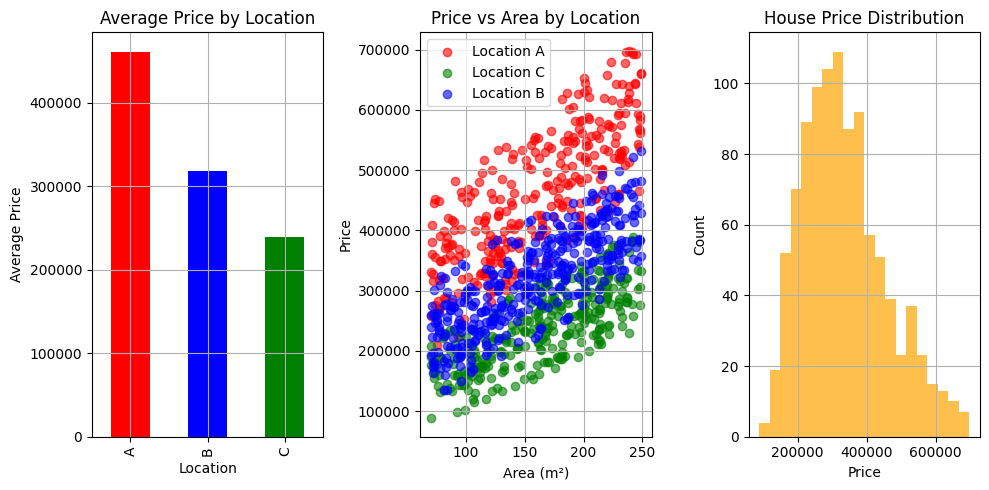


Average price: 336,333 $
Location A: 461,472 $
Location B: 318,954 $
Location C: 238,734 $


In [16]:
def show_house_data_with_location(df):

    # Figure setup
    plt.figure(figsize=(10,5))

    # Average price per location (bar chart)
    plt.subplot(1,3,1)
    df.groupby('location')['price'].mean().plot(kind='bar', color=['red','blue','green'])
    plt.title('Average Price by Location')
    plt.xlabel('Location')
    plt.ylabel('Average Price')
    plt.grid(True)

    # Price vs area scatter (by location)
    plt.subplot(1,3,2)
    colors = {'A':'red', 'B':'blue', 'C':'green'}
    for location in df['location'].unique():
        subset = df[df['location'] == location]
        plt.scatter(subset['area'], subset['price'],
                    alpha=0.6, color=colors[location], label=f'Location {location}')
    plt.title('Price vs Area by Location')
    plt.xlabel('Area (m²)')
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()

    # Price distribution (histogram)
    plt.subplot(1,3,3)
    plt.hist(df['price'], bins=20, color='orange', alpha=0.7)
    plt.title('House Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.grid(True)

    # Show all plots
    plt.tight_layout()
    plt.show()

    # Print averages
    print(f"\nAverage price: {df['price'].mean():,.0f} $")
    for location in ['A','B','C']:
        avg_price = df[df['location']==location]['price'].mean()
        print(f"Location {location}: {avg_price:,.0f} $")


# Display charts and stats
show_house_data_with_location(df)


In [17]:
def prepare_data_with_location(df):

    # Encode location as numeric feature
    df['location_code'] = df['location'].map({'A':2, 'B':1, 'C':0})

    # Select model features
    features = ['area', 'badrooms', 'age', 'location_code']
    X = df[features]
    y = df['price']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Summary
    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")
    print(f"Features used: {features}")

    return X_train, X_test, y_train, y_test

# Prepare dataset
X_train, X_test, y_train, y_test = prepare_data_with_location(df)


Training samples: 800
Testing samples: 200
Features used: ['area', 'badrooms', 'age', 'location_code']


In [18]:
def build_model(X_train, y_train):

    # Create regression model
    model = LinearRegression()

    # Train model
    model.fit(X_train, y_train)

    # Feature names (matching input order)
    features = ['area', 'badrooms', 'age', 'location_code']

    # Show feature weights
    print("\nModel Coefficients:")
    for i, coef in enumerate(model.coef_):
        print(f"{features[i]}: {coef:,.0f}")

    # Show model intercept
    print(f"Intercept: {model.intercept_:,.0f}")

    return model

# Train the model
model = build_model(X_train, y_train)



Model Coefficients:
area: 1,253
badrooms: 51,184
age: -4,165
location_code: 112,208
Intercept: -78,346


accuracy model : 97.50%
average error : 17,170$


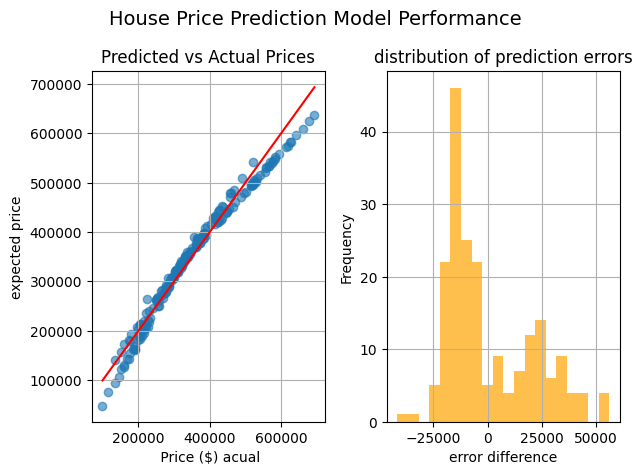

In [19]:
def evaluate_model(model,X_test,y_test):
    y_pred=model.predict(X_test)
    mae=mean_absolute_error(y_test,y_pred)
    accuracy=model.score(X_test,y_test)
    print(f'accuracy model : {accuracy:.2%}')
    print(f'average error : {mae:,.0f}$')
    plt.subplot(1,2,1)
    plt.scatter(y_test,y_pred,alpha=0.6)
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'red')
    plt.title('Predicted vs Actual Prices')
    plt.xlabel(' Price ($) acual')
    plt.ylabel('expected price')
    plt.grid(True)
    plt.subplot(1,2,2)
    errors=y_test-y_pred
    plt.hist(errors,bins=20,color='orange',alpha=0.7)
    plt.title('distribution of prediction errors')
    plt.xlabel('error difference')
    plt.ylabel('Frequency')
    plt.suptitle("House Price Prediction Model Performance", fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return accuracy
accuracy=evaluate_model(model,X_test,y_test)    

              
